In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [4]:
X, Y = np.loadtxt('pizza.txt', skiprows=1, unpack=True)

## Descenso de Gradiente
En el capitulo anterior (pizza_sales_part1.ipynb) implementamos un modelo de regresion lineal simple para predecir las ventas de pizzas en base a las reservaciones. En este capitulo vamos a implementar el algoritmo de descenso de gradiente para encontrar los parametros del modelo que minimizan la funcion de costo.

El error en una predicción era la diferencia entre el valor real (*ground truth*) y el valor predicho por el modelo.

### $$e = \hat{y} - y$$

El error cuadrático es el cuadrado de la diferencia entre el valor real y el valor predicho.
### $$e^2 = (\hat{y} - y)^2$$

La función de costo es el promedio de los errores cuadráticos de todas las observaciones en el conjunto de datos.
### $$L = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2$$

Donde: 
- $L$ es la función de costo
- $m$ es el número de observaciones en el conjunto de datos
- $\hat{y}_i$ es el valor predicho por el modelo para la observación $i$
- $y_i$ es el valor real para la observación $i$

Recordemos que:
### $$\hat{y}_i = predict(x_i, w, b) = wx_i + b$$

Donde:
- $x_i$ es la variable independiente para la observación $i$ (en este caso, el número de reservaciones)

In [5]:
# recordemos nuestra funcion de prediccion y de error
def predict(x, w, b):
		return x * w + b

def loss(X, Y, w, b):
	error = (predict(X, w, b) - Y)
	squared_error = error ** 2
	return np.average(squared_error)

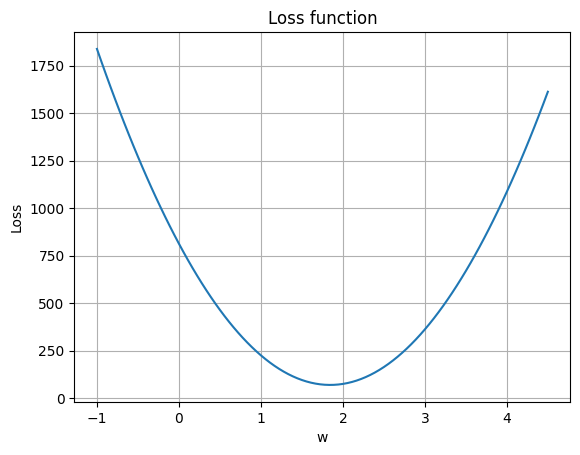

In [6]:
# Grafiquemos la funcion loss solamente en funcion de w en rango -1,4 y dejemos que b=0 para simplificar
# Definir un rango de valores de w 
w_values = np.linspace(-1, 4.5, 100)
# Calcular los valores de la funcion de perdida para cada valor de w
y = [loss(X, Y, w, 0) for w in w_values]
# Graficar
plt.plot(w_values, y)
plt.xlabel('w')
plt.ylabel('Loss')
plt.title('Loss function')
plt.grid(True)
plt.show()

Queremos encontrar el valor de $w$ que minimice la funcion de costo $L$.

Si agregamos la variable $b$ (bias) el problema se convierte en un problema de optimización en dos variables (aca es donde entra el descenso de gradiente) y se puede generalizar a un problema de optimización en n variables.

Sigamos con una sola variable, para ajustar los valores de w en cada iteracion, necesitamos calcular la derivada de la función de costo con respecto a w.

### $$\frac{d}{d w}L = 2*\frac{1}{m} \sum_{i=1}^{m} x_i(wx_i + b - y_i)$$

¿Por qué? porque la derivada en un w_i dado nos dice **EXACTAMENTE** como cambiar w_i para reducir la función de costo, o sea la pendiente de la función de costo en un punto dado. 

Si la pendiente para un w_i es **positiva**, significa que la función de costo aumenta a medida que aumentamos w_i. 
Si la pendiente es **negativa**, significa que la función de costo disminuye a medida que aumentamos w_i. 

Ademas la magnitud de la pendiente nos dice que tan rápido cambia la función de costo, por lo que si la pendiente tiene magnitud grande, significa que podemos hacer un cambio grande en w_i para reducir la función de costo.

In [7]:
# definamos la funcion que calcula el gradiente de la funcion de perdida
# en este caso el "gradiente" es la derivada de la funcion de perdida respecto a w
def gradient(X, Y, w):
	return 2 * np.average((predict(X, w, 0) - Y) * X)

### Como avanzar de acuerdo a la pendiente
Si la pendiente es negativa, debemos aumentar w para reducir la función de costo.
Si la pendiente es positiva, debemos disminuir w para reducir la función de costo.

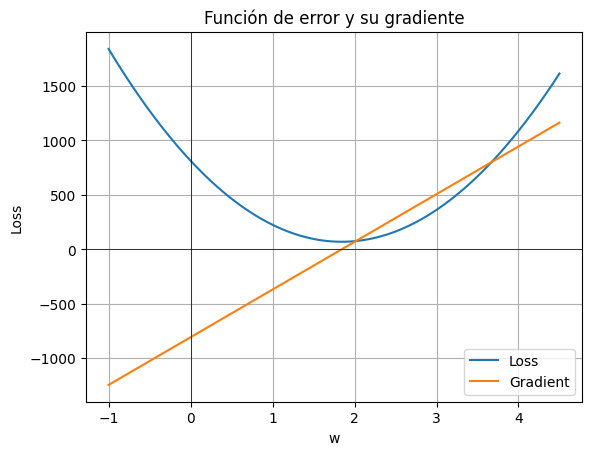

In [8]:
# Grafiquemos la funcion de perdida y su derivada
# Definir un rango de valores de w
x_values = np.linspace(-1, 4.5, 100)
# Calcular los valores de la funcion de perdida para cada valor de w
y = [loss(X, Y, w, 0) for w in x_values]
# Calcular los valores de la derivada de la funcion de perdida para cada valor de w
y_grad = [gradient(X, Y, w) for w in x_values]
# Graficar
plt.plot(x_values, y, label='Loss')
plt.plot(x_values, y_grad, label='Gradient')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlabel('w')
plt.ylabel('Loss')
plt.title('Función de error y su gradiente')
plt.legend()
plt.grid(True)
plt.show()

Podemos ver que a medida que nos acercamos al mínimo por la izquierda, la pendiente es negativa, por lo que debemos aumentar w. A medida que nos acercamos al mínimo por la derecha, la pendiente es positiva, por lo que debemos disminuir w.

$$ w = w - (\alpha * \frac{d}{d w}L)$$

El valor de $\alpha$ es el **learning rate**. Es un hiperparámetro¹ que controla que tan grande es el cambio que hacemos en cada iteración. Si $\alpha$ es muy grande, podemos saltar el mínimo. Si $\alpha$ es muy pequeño, el algoritmo puede ser muy lento.

In [11]:
# Ahora redefinamos la funcion de entrenamiento para que utilice el gradiente
def train(X, Y, iterations, learning_rate):
	w = 0
	for i in range(iterations):
		gradiente = gradient(X, Y, w)

		print("Iteration %d => loss: %.10f | gradient: %.8f | w: %.5f" % (i, loss(X, Y, w, 0), gradiente, w))

		w = w - (gradiente * learning_rate)

	return w


In [12]:
# Ahora vamos a entrenar el modelo!!!
w = train(X, Y, iterations=100, learning_rate=0.001)

Iteration 0 => loss: 812.8666666667 | gradient: -806.80000000 | w: 0.00000
Iteration 1 => loss: 304.3630879787 | gradient: -453.74432000 | w: 0.80680
Iteration 2 => loss: 143.5265791020 | gradient: -255.18580557 | w: 1.26054
Iteration 3 => loss: 92.6549949641 | gradient: -143.51649705 | w: 1.51573
Iteration 4 => loss: 76.5646303400 | gradient: -80.71367794 | w: 1.65925
Iteration 5 => loss: 71.4753484132 | gradient: -45.39337247 | w: 1.73996
Iteration 6 => loss: 69.8656402969 | gradient: -25.52923268 | w: 1.78535
Iteration 7 => loss: 69.3564996643 | gradient: -14.35764046 | w: 1.81088
Iteration 8 => loss: 69.1954616593 | gradient: -8.07473699 | w: 1.82524
Iteration 9 => loss: 69.1445263431 | gradient: -4.54123209 | w: 1.83332
Iteration 10 => loss: 69.1284158205 | gradient: -2.55398892 | w: 1.83786
Iteration 11 => loss: 69.1233201627 | gradient: -1.43636337 | w: 1.84041
Iteration 12 => loss: 69.1217084379 | gradient: -0.80781076 | w: 1.84185
Iteration 13 => loss: 69.1211986595 | gradient

Podemos ver que a partir de pocas iteraciones el ajuste de los parametros es cada vez menor hasta casi (si, claro) llegar al mínimo teórico. Y ademas se necesitaron muchas menos iteraciones para llegar a un valor de w aceptable.

In [15]:
print(f"w= {w}")

w= 1.8436928702010968
